# Credit-Score-Classification

- Projeto de classificação de clientes de acordo com seus dados pessoais e financeiros. Dataset disponível em https://www.kaggle.com/laotse/credit-risk-dataset.
- GitHub : https://github.com/Ewertonv90/Credit-Score-Classification



# EN

Problem Statement
You are working as a data scientist in a global finance company. Over the years, the company has collected basic bank details and gathered a lot of credit-related information. The management wants to build an intelligent system to segregate the people into credit score brackets to reduce the manual efforts.

Task
Given a person’s credit-related information, build a machine learning model that classifies the customer if credit can be released or not.

# PT-BR

Declaração do problema
Você está trabalhando como cientista de dados em uma empresa financeira global. Ao longo dos anos, a empresa coletou dados bancários básicos e reuniu muitas informações relacionadas a crédito. A gerência quer construir um sistema inteligente para segregar as pessoas em faixas de pontuação de crédito para reduzir os esforços manuais.

Tarefa
Dadas as informações relacionadas ao crédito de uma pessoa, construa um modelo de aprendizado de máquina que possa classificar o cliente e se o crédito deve ser liberado ou não.

# Data dictonary

 

- person_age             =     Age
- person_income	          =  Annual Income
- personhomeownership	   =     Home ownership
- personemplength	        =    Employment length (in years)
- loan_intent	             =   Loan intent
- loan_grade	           =     Loan grade
- loan_amnt	              =  Loan amount
- loanintrate	          =      Interest rate
- loan_status	          =      Loan status (0 is non default 1 is default)
- loanpercentincome	     =   Percent income
- cbpersondefaultonfile	  =  Historical default
- cbpresoncredhistlength	=    Credit history length

# 1.1 Data Undestanding

In [181]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px



In [182]:
df = pd.read_csv('C:/Users/ewert/Desktop/Credit-Score-Classification/raw dataset/credit_risk_dataset.csv')


In [183]:
df.describe()


,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


- Média salaria de $ 6.607 dolares anuais
- Esses salarios variam 6.1983 dolares anuais para mais ou para menos.
- Como se é esperado, quanto maior a idade, maior o salário.

In [184]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [185]:
df.shape

(32581, 12)

# EDA 

<AxesSubplot:xlabel='loan_status', ylabel='count'>

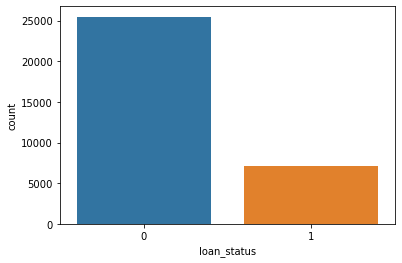

In [186]:
np.unique(df['loan_status'], return_counts=True)

sns.countplot(x = df['loan_status'])


- O target Loan Status é o nosso alvo pra determinar o risco de crédito, caso seja 0 o valor, o emprestimo está em dia, caso seja 1, o cliente não pagou a dívida. Préviamente, 25473 clientes da base de dados pagaram suas dívidas, e 7108 estão em atraso. Isso representa cerca de 78,18% de pessoas em dia e 21,82% possuem dívidas em atraso, somando o total de 32581 registros de clientes. 

(array([2.693e+04, 4.891e+03, 6.510e+02, 8.900e+01, 1.300e+01, 2.000e+00,
        0.000e+00, 0.000e+00, 2.000e+00, 3.000e+00]),
 array([ 20. ,  32.4,  44.8,  57.2,  69.6,  82. ,  94.4, 106.8, 119.2,
        131.6, 144. ]),
 <BarContainer object of 10 artists>)

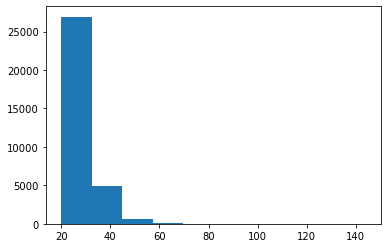

In [187]:
plt.hist(x=df['person_age'])

- A maioria dos clientes tem entre 20 e 42 anos

person_home_ownership
MORTGAGE    13444
OTHER         107
OWN          2584
RENT        16446
Name: person_home_ownership, dtype: int64

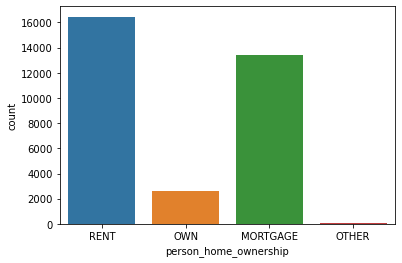

In [188]:
sns.countplot(x = df['person_home_ownership'])
df['person_home_ownership'].groupby(df['person_home_ownership']) .count()

- 41,26% dos clientes moram em imóveis hipotecados.
- 50,48% dos  clientes moram em imóveis alugados.
- 7,94% dos clientes tem casa própria quitada.
- 0,32% dos clientes tem imóveis em situações diversas, diferentes das principais citadas acima.

In [189]:
graphic = px.scatter_matrix(df, dimensions=['person_age','person_income', 'loan_amnt'], color= 'loan_status')
graphic.show()

In [190]:
graphic = px.scatter_matrix(df, dimensions=['loan_amnt','person_emp_length'], color= 'loan_status')
graphic.show()

# Endividamento x salario 
- As pessoas que ganham mais, tem tendência a atrasar mais as dívidas que as que ganham menos, e os que não tem muito tempo no emprego tem menos atrasos.

{'whiskers': [<matplotlib.lines.Line2D at 0x1c4247f9460>,
 'caps': [<matplotlib.lines.Line2D at 0x1c4247f9b80>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c4247f90d0>],
 'medians': [<matplotlib.lines.Line2D at 0x1c4247f02e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c4247f06a0>],
 'means': []}

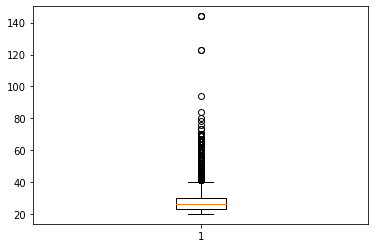

In [191]:
plt.boxplot(df['person_age'])


- Já identificada presença de outiliers, como pessoas de 123 e 144 anos.

# Data preparation

Preparação do dataset para modelagem

- Retirada de campos desnecessários para atingir o alvo: loan_grade e loan_intent.
- Retirada de outliers na coluna Age: idades entre 100 e  144 anos de idade, retirada de idades negativas.
- Dummificação de dados categóricos(One hot encoding): person_home_ownership e cb_person_default_on_file
- alteração dos tipos de dados object para float 

In [192]:

df = df.drop(columns=[ 'loan_grade'])
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,35000,14.27,1,0.55,Y,4


In [193]:
df = df.drop(columns=['loan_intent','person_emp_length', 'loan_int_rate'])
df.head()

,person_age,person_income,person_home_ownership,loan_amnt,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,35000,1,0.59,Y,3
1,21,9600,OWN,1000,0,0.10,N,2
2,25,9600,MORTGAGE,5500,1,0.57,N,3
3,23,65500,RENT,35000,1,0.53,N,2
4,24,54400,RENT,35000,1,0.55,Y,4


In [194]:
df.loc[df['person_age'] >= 100]

,person_age,person_income,person_home_ownership,loan_amnt,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
81,144,250000,RENT,4800,0,0.02,N,3
183,144,200000,MORTGAGE,6000,0,0.03,N,2
575,123,80004,RENT,20400,0,0.25,N,3
747,123,78000,RENT,20000,0,0.26,N,4
32297,144,6000000,MORTGAGE,5000,0,0.00,N,25


In [195]:

df = df.drop(81)
df = df.drop(183)
df = df.drop(575)
df = df.drop(747)
df = df.drop(32297)


In [196]:

total_nan_values = df.isnull().sum()
print (total_nan_values)

person_age                    0
person_income                 0
person_home_ownership         0
loan_amnt                     0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64


In [197]:
df.loc[df['person_age'] >= 100]

,person_age,person_income,person_home_ownership,loan_amnt,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length


In [198]:
df = pd.get_dummies(df, columns=['person_home_ownership', 'cb_person_default_on_file'])
# cb_person_default_on_file

df

,person_age,person_income,loan_amnt,loan_status,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,cb_person_default_on_file_N,cb_person_default_on_file_Y
0,22,59000,35000,1,0.59,3,0,0,0,1,0,1
1,21,9600,1000,0,0.10,2,0,0,1,0,1,0
2,25,9600,5500,1,0.57,3,1,0,0,0,1,0
3,23,65500,35000,1,0.53,2,0,0,0,1,1,0
4,24,54400,35000,1,0.55,4,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,5800,0,0.11,30,1,0,0,0,1,0
32577,54,120000,17625,0,0.15,19,1,0,0,0,1,0
32578,65,76000,35000,1,0.46,28,0,0,0,1,1,0
32579,56,150000,15000,0,0.10,26,1,0,0,0,1,0


In [199]:
df.dtypes

person_age                          int64
person_income                       int64
loan_amnt                           int64
loan_status                         int64
loan_percent_income               float64
cb_person_cred_hist_length          int64
person_home_ownership_MORTGAGE      uint8
person_home_ownership_OTHER         uint8
person_home_ownership_OWN           uint8
person_home_ownership_RENT          uint8
cb_person_default_on_file_N         uint8
cb_person_default_on_file_Y         uint8
dtype: object

# Data modeling

Modelagem de dados será realizada utilizando as melhores técnicas de classificação do mercado:

- Regressão logística
- Random forest
- Gradient Boosting
- Extreme Gradient Boosting(XGBoost)

### Metricas de avaliação dos modelos:

- F1 Score
- Accuracy Score
- Precision Score
- Recall Score

In [200]:
X = df.drop(columns=['loan_status'])
y = df['loan_status']
X.dropna()
y.dropna()

0        1
1        0
2        1
3        1
4        1
        ..
32576    0
32577    0
32578    1
32579    0
32580    0
Name: loan_status, Length: 32576, dtype: int64

# Separando 33% dos dados para treinamento

In [201]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.3, random_state=42)

print('X_train: ', X_train.shape)
print('X_test: ', X_test.shape)
print('y_train: ', y_train.shape)
print('y_test: ', y_test.shape)

X_train:  (22803, 11)
X_test:  (9773, 11)
y_train:  (22803,)
y_test:  (9773,)


# Regressão logística

In [202]:
from sklearn.model_selection import GridSearchCV

params = {
    'C': (0.01, 1, 10, 100),
    'penalty': ('l1', 'l2', None)
}

In [203]:
X.isnull().values.any() and y.isnull().values.any()

False

In [204]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()

grid_search = GridSearchCV(estimator=clf, param_grid= params , n_jobs= -1 , cv=3 , verbose= 0 )

grid_search.fit(X_train, y_train)

c:\Users\ewert\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning:

One or more of the test scores are non-finite: [       nan 0.80572732        nan        nan 0.80572732        nan
        nan 0.80572732        nan        nan 0.80572732        nan]



GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': (0.01, 1, 10, 100),
                         'penalty': ('l1', 'l2', None)})

In [205]:
print(grid_search.best_params_)
best_rf = grid_search.best_estimator_

{'C': 0.01, 'penalty': 'l2'}


# Métricas do modelo treinado com Regressão logística

In [206]:
from sklearn.metrics import f1_score,accuracy_score, precision_score, recall_score

y_pred = best_rf.predict(X_test)

f1 = round(f1_score(y_test,y_pred, average='micro')*100, 2)
accuracy = round(accuracy_score(y_test, y_pred)*100, 2)
precision = round(precision_score(y_test, y_pred)*100,2)
recall = round(recall_score(y_test, y_pred, average='micro')*100,2)

print(f"F1 Score: {f1}%")
print(f"Accuracy Score: {accuracy}%")
print(f"Precision Score: {precision}%")
print(f"Recall Score: {recall}%")

metrics = {}

metrics['LogisticRegression'] = {
    'f1' : f1,
    'accuracy' : accuracy,
    'precision' : precision,
    'recall' : recall
}

F1 Score: 80.74%
Accuracy Score: 80.74%
Precision Score: 73.19%
Recall Score: 80.74%


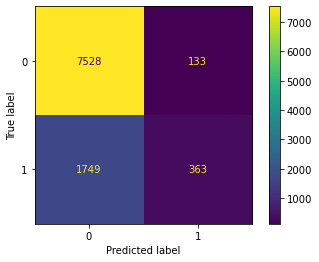

In [207]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(best_rf, X_test, y_test, values_format='d')  
plt.grid(False)
plt.show()

# Random Forest classifier

In [208]:
from sklearn.ensemble import RandomForestClassifier

params = {
    'max_depth' : [100, 150],
    'max_features' : [3, 4, 5],
    'criterion' : ['gini', 'entropy'],
    'min_samples_leaf' : [1, 2, 3],
    'min_samples_split' : [2, 3, 8, 10],
    'n_estimators' : [200, 300, 400]
}

In [209]:
from skopt import BayesSearchCV

clf = RandomForestClassifier()

bayes_search = BayesSearchCV(clf, search_spaces= params, n_jobs=-1, cv=3, verbose=0 )

bayes_search.fit(X_train, y_train)

BayesSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
              search_spaces={'criterion': ['gini', 'entropy'],
                             'max_depth': [100, 150], 'max_features': [3, 4, 5],
                             'min_samples_leaf': [1, 2, 3],
                             'min_samples_split': [2, 3, 8, 10],
                             'n_estimators': [200, 300, 400]})

In [210]:
print(bayes_search.best_params_)

best_rf = bayes_search.best_estimator_

OrderedDict([('criterion', 'entropy'), ('max_depth', 100), ('max_features', 3), ('min_samples_leaf', 3), ('min_samples_split', 10), ('n_estimators', 400)])


# Metricas do modelo treinado com Random Forest Classifier

In [211]:
y_pred = best_rf.predict(X_test)

f1 = round(f1_score(y_test, y_pred, average="micro")*100, 2)
accuracy = round(accuracy_score(y_test, y_pred)*100, 2)
precision = round(precision_score(y_test, y_pred)*100 , 2)
recall = round(recall_score(y_test, y_pred, average='micro')*100 , 2)

print(f"F1 Score: {f1}%")
print(f"Accuracy Score: {accuracy}%")
print(f"Precision Score: {precision}%")
print(f"Recall Score: {recall}%")

metrics["RandomForest"] = {

       "accuracy" : accuracy,
       "precision" : precision,
       "recall" : recall,
       "f1" : f1
 }

F1 Score: 87.37%
Accuracy Score: 87.37%
Precision Score: 90.88%
Recall Score: 87.37%


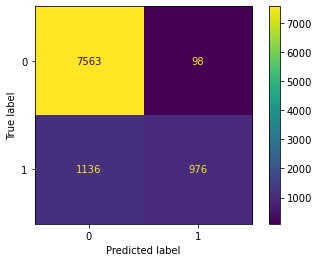

In [212]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(best_rf, X_test, y_test, values_format='d')  
plt.grid(False)
plt.show()

# Gradient Boosting classifier

In [213]:
from sklearn.ensemble import GradientBoostingClassifier

params = {
    'n_estimators' : [100, 200, 300],
    'learning_rate' : [0.1, 0.5, 1.0],
    'subsample': [0.1,  0.3, 0.5, 0.8, 1.0],
    'loss': ['log_loss', 'deviance', 'exponential'],
    'criterion' : ['squared_error', 'mse'],
    'max_depth' : [1, 3, 5, 10],
    'min_samples_leaf' : [1,3, 5, 10],
    'min_samples_split': [1, 3, 5, 10]
}

In [214]:
from sklearn.model_selection import GridSearchCV

clf = GradientBoostingClassifier( criterion='mse', learning_rate=0.1, loss='exponential', max_depth=5, min_samples_leaf=5, min_samples_split=10, n_estimators=300
, subsample= 0.8)

clf.fit(X_train, y_train)

GradientBoostingClassifier(criterion='mse', loss='exponential', max_depth=5,
                           min_samples_leaf=5, min_samples_split=10,
                           n_estimators=300, subsample=0.8)

In [215]:
#grid_search = GridSearchCV(estimator=clf, param_grid= params , n_jobs= -1 , cv=3 , verbose= 0 )

#grid_search.fit(X_train, y_train)

In [216]:
print(grid_search.best_params_)
best_rf = grid_search.best_estimator_
#{'criterion': 'mse', 'learning_rate': 0.1, 'loss': 'exponential', 'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 300, 'subsample': 0.8}

{'C': 0.01, 'penalty': 'l2'}


# Metricas do modelo treinado com Gradient boosting Classifier

In [217]:
y_pred = best_rf.predict(X_test)

f1 = round(f1_score(y_test, y_pred, average="micro")*100, 2)
accuracy = round(accuracy_score(y_test, y_pred)*100, 2)
precision = round(precision_score(y_test, y_pred)*100 , 2)
recall = round(recall_score(y_test, y_pred, average='micro')*100 , 2)

print(f"F1 Score: {f1}%")
print(f"Accuracy Score: {accuracy}%")
print(f"Precision Score: {precision}%")
print(f"Recall Score: {recall}%")

metrics["Gradient_boosting"] = {

       "accuracy" : accuracy,
       "precision" : precision,
               "recall" : recall,
       "f1" : f1
 }

F1 Score: 80.74%
Accuracy Score: 80.74%
Precision Score: 73.19%
Recall Score: 80.74%


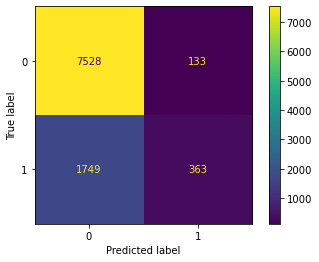

In [218]:
plot_confusion_matrix(best_rf, X_test, y_test, values_format='d')  
plt.grid(False)
plt.show()

# Extreme Gradient Boosting (XGBoost)

In [219]:
%pip install xgboost


[notice] A new release of pip available: 22.2 -> 22.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [220]:
from xgboost import XGBClassifier

xgb = XGBClassifier()

params = {
   'booster': ['gbtree', 'gblinear', 'dart'],
   'verbosity' : [0],
   'learning_rate': [0.1, 0.5, 1.0],
   'max_depth': [1, 3, 6, 8, 10]
}


In [221]:
grid_search = GridSearchCV(estimator=xgb, param_grid= params , n_jobs= -1 , cv=3 , verbose= 0 )

grid_search.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_ca...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                  

In [222]:
print(grid_search.best_params_)
best_rf = grid_search.best_estimator_

{'booster': 'gbtree', 'learning_rate': 0.5, 'max_depth': 3, 'verbosity': 0}


# Metricas do modelo treinado com XGBoost Classifier

In [223]:
y_pred = best_rf.predict(X_test)

f1 = round(f1_score(y_test, y_pred, average="macro")*100, 2)
accuracy = round(accuracy_score(y_test, y_pred)*100, 2)
precision = round(precision_score(y_test, y_pred)*100 , 2)
recall = round(recall_score(y_test, y_pred, average='micro')*100 , 2)

print(f"F1 Score: {f1}%")
print(f"Accuracy Score: {accuracy}%")
print(f"Precision Score: {precision}%")
print(f"Recall Score: {recall}%")

metrics["XGBoost"] = {

       "accuracy" : accuracy,
       "precision" : precision,
       "recall" : recall,
       "f1" : f1
 }

F1 Score: 79.15%
Accuracy Score: 88.18%
Precision Score: 88.93%
Recall Score: 88.18%


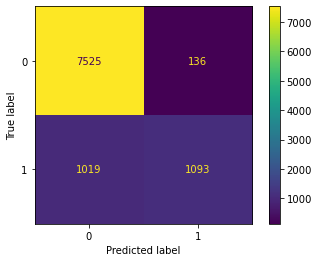

In [224]:
plot_confusion_matrix(best_rf, X_test, y_test, values_format='d')  
plt.grid(False)
plt.show()

In [225]:
metrics

{'LogisticRegression': {'f1': 80.74,
  'accuracy score': 80.74,
  'precision score': 73.19,
  'recall score': 80.74},
 'RandomForest': {'accuracy': 87.37,
  'precision': 90.88,
  'recall': 87.37,
  'f1': 87.37},
 'Gradient_boosting': {'accuracy': 80.74,
  'precision': 73.19,
  'recall': 80.74,
  'f1': 80.74},
 'XGBoost': {'accuracy': 88.18,
  'precision': 88.93,
  'recall': 88.18,
  'f1': 79.15}}

In [226]:
 print(metrics['LogisticRegression'])
 print(metrics['RandomForest'])
 print(metrics['Gradient_boosting'])
 print(metrics['XGBoost'])


{'f1': 80.74, 'accuracy score': 80.74, 'precision score': 73.19, 'recall score': 80.74}
{'accuracy': 87.37, 'precision': 90.88, 'recall': 87.37, 'f1': 87.37}
{'accuracy': 80.74, 'precision': 73.19, 'recall': 80.74, 'f1': 80.74}
{'accuracy': 88.18, 'precision': 88.93, 'recall': 88.18, 'f1': 79.15}
